In [1]:
# Initial imports.
import os
import io
import sagemaker

%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')
import pickle, gzip, urllib, json
import csv
from sklearn.preprocessing import MinMaxScaler


# from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

In [2]:
# Import data
pre_df = pd.read_csv("merged_internet_access.csv")
pre_df.head()

geo_id                      county_name  population  sex_total_men  \
0  0500000US06033          Lake County, California       64148          31879   
1  0500000US06043      Mariposa County, California       17540           8920   
2  0500000US06115          Yuba County, California       75493          38468   
3  0500000US06013  Contra Costa County, California     1133247         553701   
4  0500000US06035        Lassen County, California       31185          20671   

   sex_total_women  race_hispanic_or_latino  race_not_hispanic_or_latino  \
0            32269                    12830                        51318   
1             8620                     1909                        15631   
2            37025                    20990                        54503   
3           579546                   288101                       845146   
4            10514                     5834                        25351   

   race_american_indian_and_alaska_native  race_asian  \
0                                    2090         642   
1                                     390         243   
2                                     643        4977   
3                                    2376      182135   
4                                     847         436   

   race_black_or_african_american  ...  age_35-44  age_45-54  age_55-59  \
0                            1426  ...       6706       8097       5137   
1                             166  ...       1614       2284       1503   
2                            2340  ...       9193       8410       4592   
3                           93683  ...     151683     164203      78858   
4                            2695  ...       4353       3899       1803   

   age_60-64  age_65-74  age_75-84  age_85_and_over  dl_speed_100_ua  \
0       5540       8591       3975             1375             25.0   
1       1683       2778       1556              356             25.0   
2       4001       5647       2311             1117             25.0   
3      69200      99537      48565            21680             25.0   
4       1891       2504       1250              403             25.0   

   dl_speed_level_up  level_up_access_pop_percent  
0              100.0                     0.880890  
1              100.0                     0.407778  
2              100.0                     0.758733  
3              100.0                     0.976652  
4              100.0                     0.517515  

[5 rows x 89 columns]

In [3]:
pre_df.shape

(58, 89)

In [4]:
pre_df.index=pre_df['geo_id'] + "-" + pre_df['county_name']
pre_df.head()
drop=['geo_id', 'county_name', 'sex_total_men', 'sex_total_women', 'race_two_or_more_including_some_other', 
      'race_two_or_more_excluding_some_ther_and_three_or_more', 'occupation_population_16_and_over_total', 
      'hh_with_computer_and_internet_total', 'hh_with_computer', 'employment_%_unemployment_rate', 
      'hh_with_income_total', 'hh_median_income', 'hh_mean_income', 'family_structure_hh_total',
      'employment_16_and_over_in_labor_force', '%_eduction_population_25_and_over_less_than_9th_grade', 
      '%_eduction_population_25_and_over_9th-12th_no_diploma', '%_eduction_population_25_and_over_high_school_graduate', 
      '%_eduction_population_25_and_over_some_college_no_degree', '%_eduction_population_25_and_over_associates_degree', 
      '%_eduction_population_25_and_over_bachelors_degree', 
      '%_eduction_population_25_and_over_graduate_or_professional_degree', 'disability_population_under_18', 
      'disability_population_18-64', 'disability_population_65_and_over', 'dl_speed_100_ua', 'dl_speed_level_up', 
      'level_up_access_pop_percent']
pre_df.drop(drop, axis=1, inplace=True)
pre_df.head()


population  \
0500000US06033-Lake County, California               64148   
0500000US06043-Mariposa County, California           17540   
0500000US06115-Yuba County, California               75493   
0500000US06013-Contra Costa County, California     1133247   
0500000US06035-Lassen County, California             31185   

                                                race_hispanic_or_latino  \
0500000US06033-Lake County, California                            12830   
0500000US06043-Mariposa County, California                         1909   
0500000US06115-Yuba County, California                            20990   
0500000US06013-Contra Costa County, California                   288101   
0500000US06035-Lassen County, California                           5834   

                                                race_not_hispanic_or_latino  \
0500000US06033-Lake County, California                                51318   
0500000US06043-Mariposa County, California                            15631   
0500000US06115-Yuba County, California                                54503   
0500000US06013-Contra Costa County, California                       845146   
0500000US06035-Lassen County, California                              25351   

                                                race_american_indian_and_alaska_native  \
0500000US06033-Lake County, California                                            2090   
0500000US06043-Mariposa County, California                                         390   
0500000US06115-Yuba County, California                                             643   
0500000US06013-Contra Costa County, California                                    2376   
0500000US06035-Lassen County, California                                           847   

                                                race_asian  \
0500000US06033-Lake County, California                 642   
0500000US06043-Mariposa County, California             243   
0500000US06115-Yuba County, California                4977   
0500000US06013-Contra Costa County, California      182135   
0500000US06035-Lassen County, California               436   

                                                race_black_or_african_american  \
0500000US06033-Lake County, California                                    1426   
0500000US06043-Mariposa County, California                                 166   
0500000US06115-Yuba County, California                                    2340   
0500000US06013-Contra Costa County, California                           93683   
0500000US06035-Lassen County, California                                  2695   

                                                race_native_hawaiian_and_other_pacific_islander  \
0500000US06033-Lake County, California                                                       30   
0500000US06043-Mariposa County, California                                                   54   
0500000US06115-Yuba County, California                                                      292   
0500000US06013-Contra Costa County, California                                             5251   
0500000US06035-Lassen County, California                                                    205   

                                                race_some_other_race  \
0500000US06033-Lake County, California                           142   
0500000US06043-Mariposa County, California                        20   
0500000US06115-Yuba County, California                           126   
0500000US06013-Contra Costa County, California                  3829   
0500000US06035-Lassen County, California                          22   

                                                race_two_or_more  \
0500000US06033-Lake County, California                      1365   
0500000US06043-Mariposa County, California                   633   
0500000US06115-Yuba County, California                      4040   
0500000US06013-Contra Costa County, Califo

In [5]:
pre_df.shape

(58, 61)

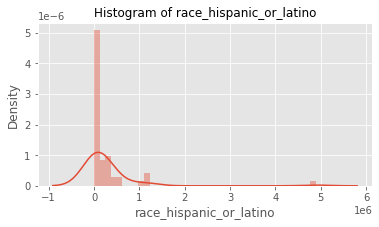

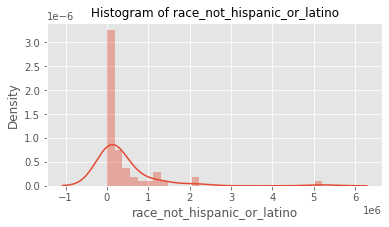

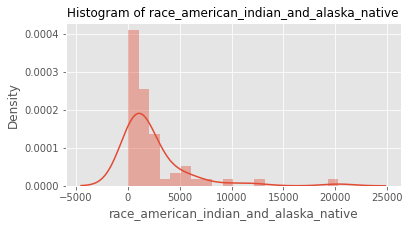

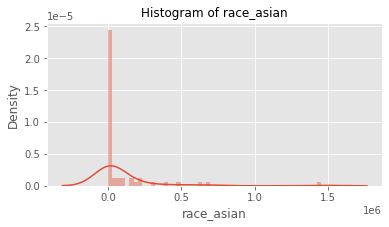

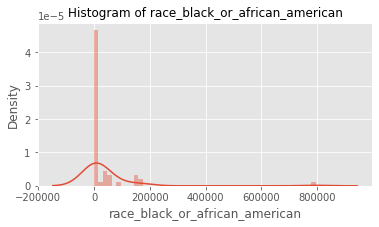

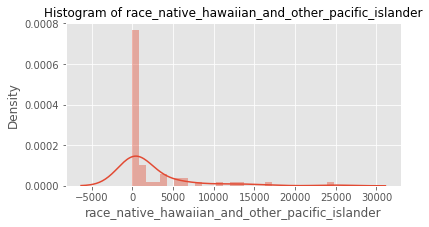

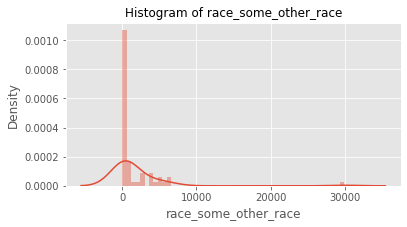

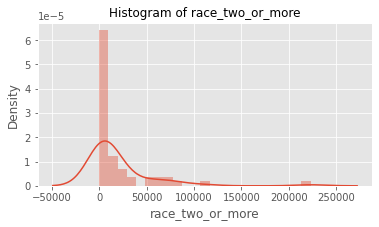

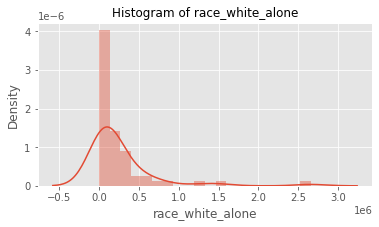

In [6]:
for a in ['race_hispanic_or_latino',
 'race_not_hispanic_or_latino',
 'race_american_indian_and_alaska_native',
 'race_asian',
 'race_black_or_african_american',
 'race_native_hawaiian_and_other_pacific_islander',
 'race_some_other_race',
 'race_two_or_more',
 'race_white_alone']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

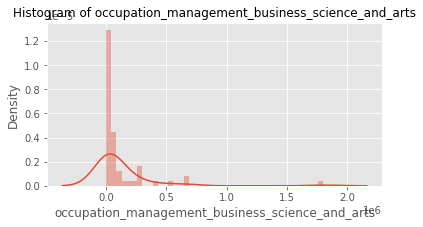

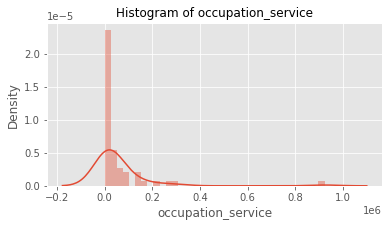

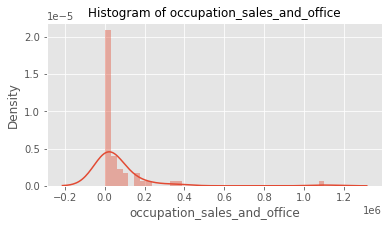

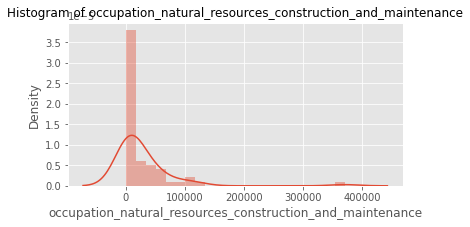

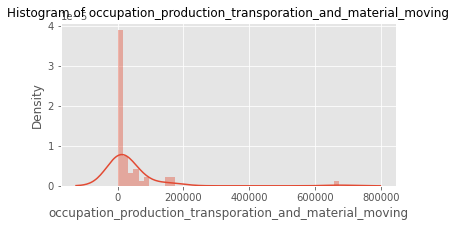

In [7]:
for a in ['occupation_management_business_science_and_arts',
 'occupation_service',
 'occupation_sales_and_office',
 'occupation_natural_resources_construction_and_maintenance',
 'occupation_production_transporation_and_material_moving'
]:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

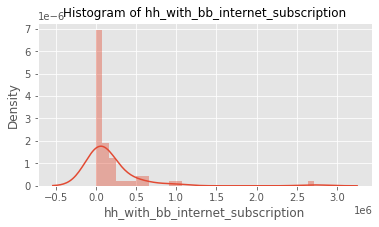

In [7]:
for a in ['hh_with_bb_internet_subscription']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

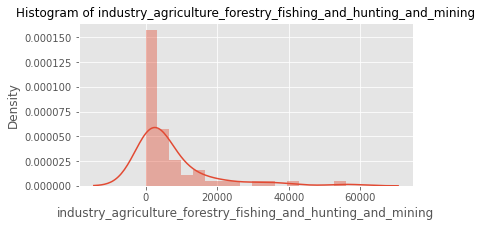

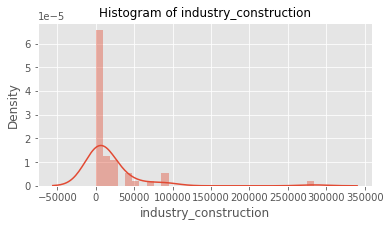

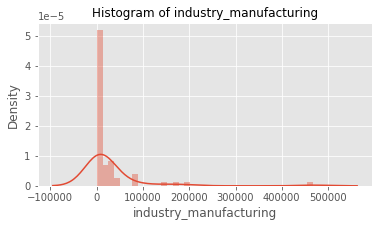

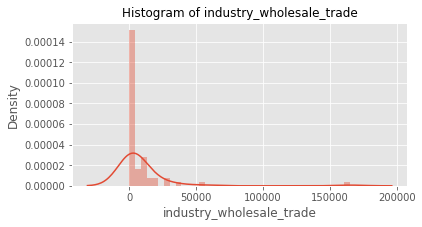

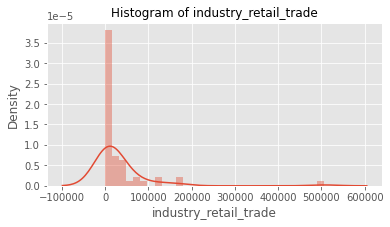

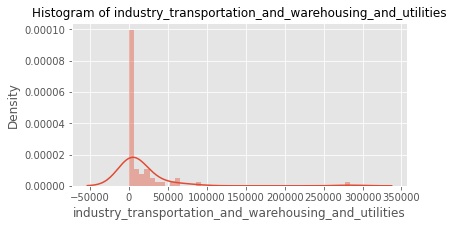

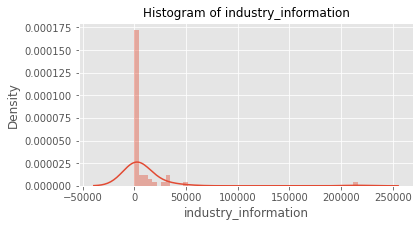

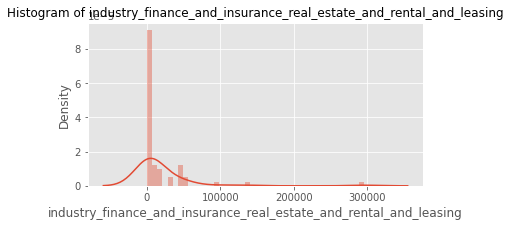

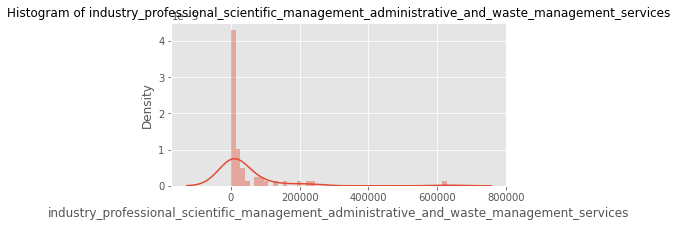

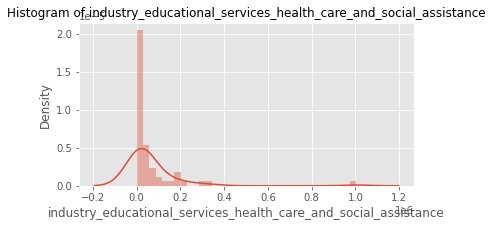

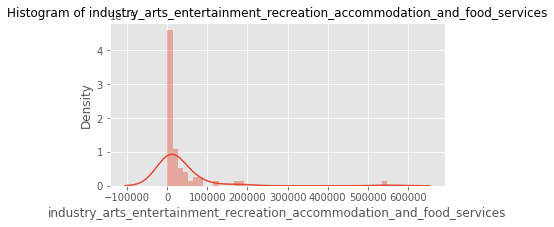

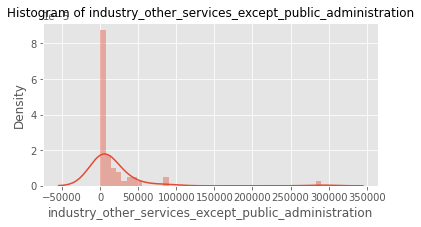

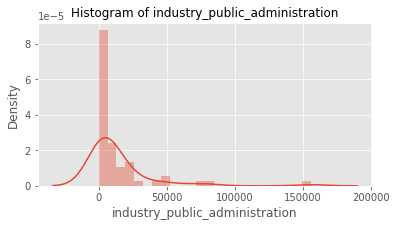

In [8]:
for a in ['industry_agriculture_forestry_fishing_and_hunting_and_mining',
 'industry_construction',
 'industry_manufacturing',
 'industry_wholesale_trade',
 'industry_retail_trade',
 'industry_transportation_and_warehousing_and_utilities',
 'industry_information',
 'industry_finance_and_insurance_real_estate_and_rental_and_leasing',
 'industry_professional_scientific_management_administrative_and_waste_management_services',
 'industry_educational_services_health_care_and_social_assistance',
 'industry_arts_entertainment_recreation_accommodation_and_food_services',
 'industry_other_services_except_public_administration',
 'industry_public_administration']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

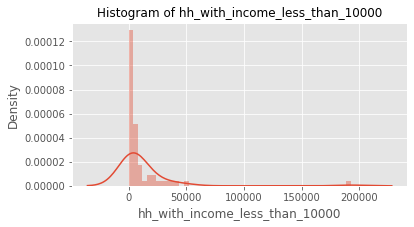

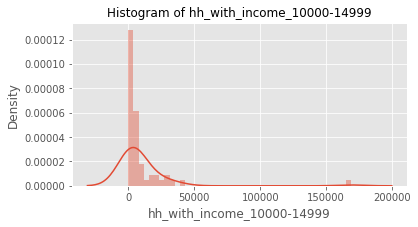

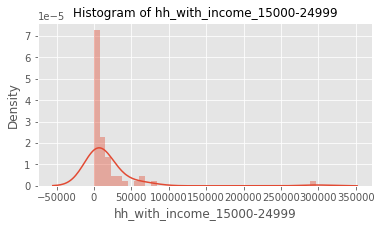

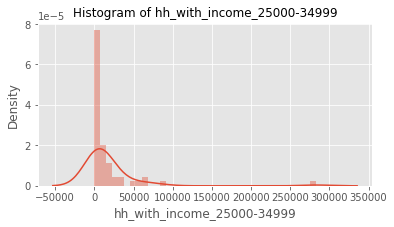

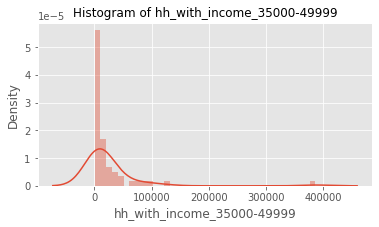

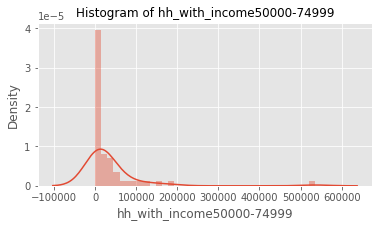

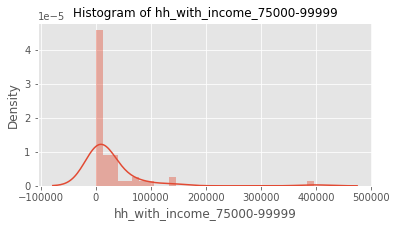

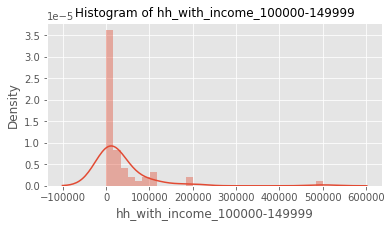

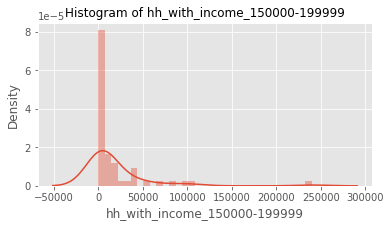

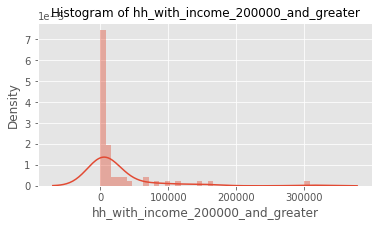

In [9]:
for a in ['hh_with_income_less_than_10000',
 'hh_with_income_10000-14999',
 'hh_with_income_15000-24999',
 'hh_with_income_25000-34999',
 'hh_with_income_35000-49999',
 'hh_with_income50000-74999',
 'hh_with_income_75000-99999',
 'hh_with_income_100000-149999',
 'hh_with_income_150000-199999',
 'hh_with_income_200000_and_greater']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

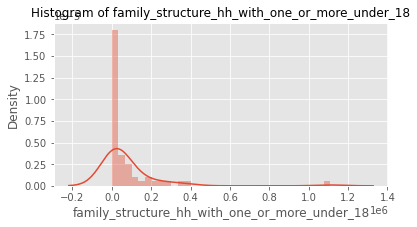

In [11]:
for a in ['family_structure_hh_with_one_or_more_under_18']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

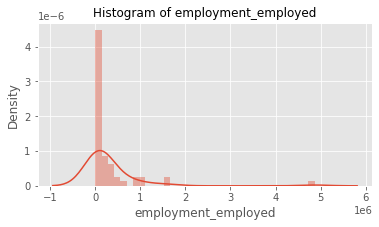

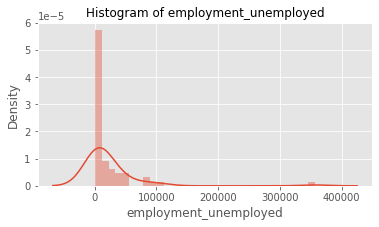

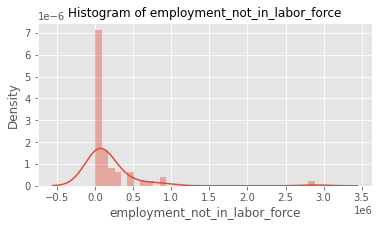

In [12]:
for a in ['employment_employed',
 'employment_unemployed',
 'employment_not_in_labor_force']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

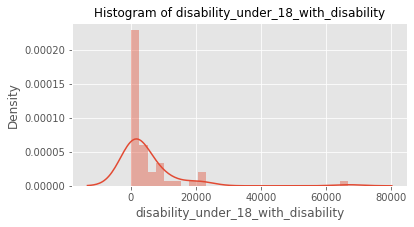

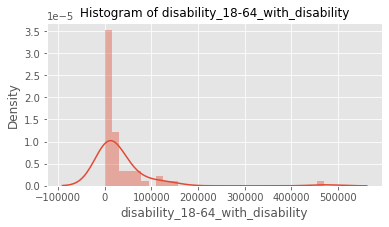

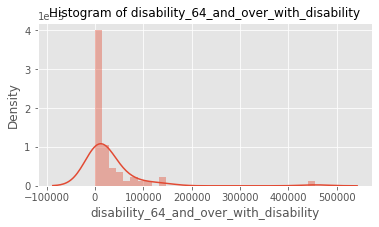

In [13]:
for a in ['disability_under_18_with_disability',
 'disability_18-64_with_disability',
 'disability_64_and_over_with_disability']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

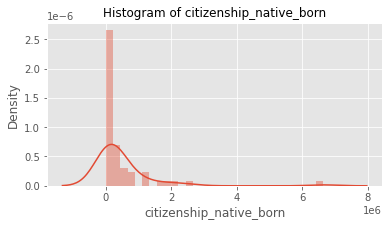

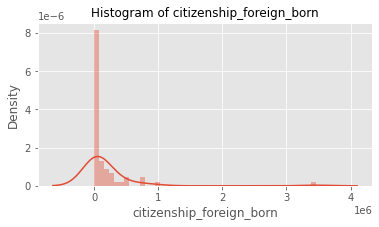

In [14]:
for a in ['citizenship_native_born',
 'citizenship_foreign_born']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

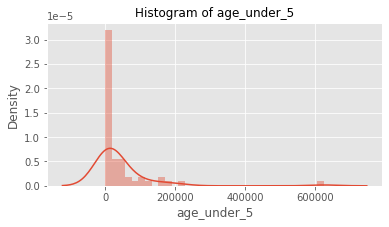

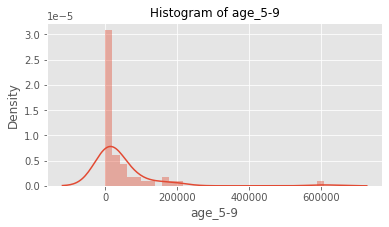

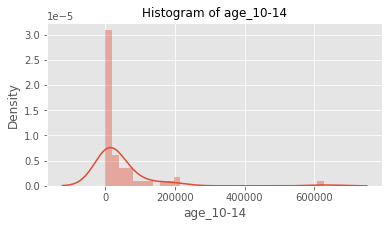

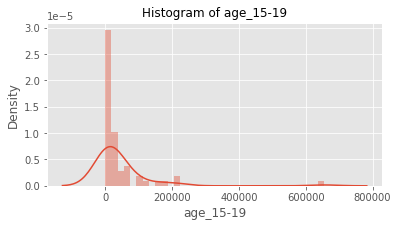

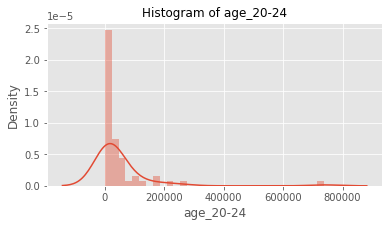

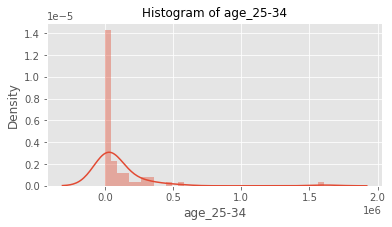

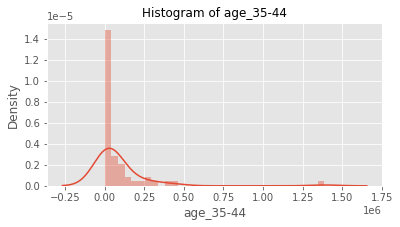

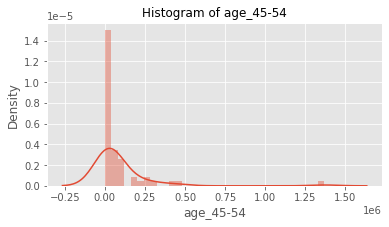

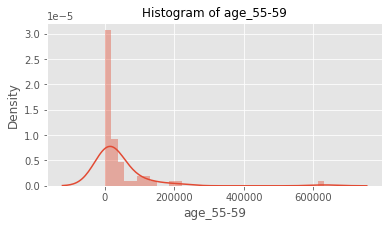

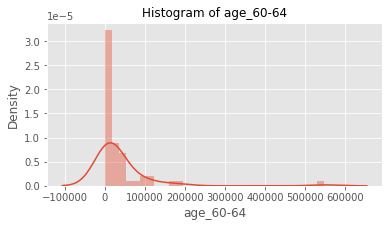

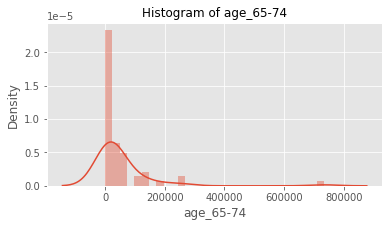

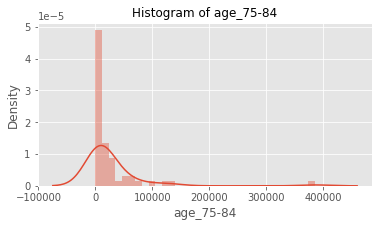

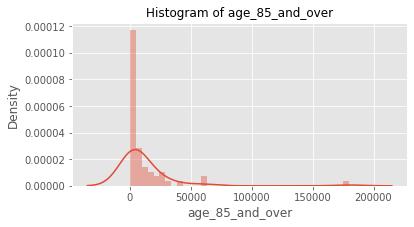

In [15]:
for a in ['age_under_5',
 'age_5-9',
 'age_10-14',
 'age_15-19',
 'age_20-24',
 'age_25-34',
 'age_35-44',
 'age_45-54',
 'age_55-59',
 'age_60-64',
 'age_65-74',
 'age_75-84',
 'age_85_and_over']:
    ax=plt.subplots(figsize=(6,3))
    ax=sns.distplot(pre_df[a])
    title="Histogram of " + a
    ax.set_title(title, fontsize=12)
    plt.show()

# Feature Extraction

In [19]:
pre_df["occupation_sales_service_office"] = pre_df["occupation_service"] + pre_df["occupation_sales_and_office"]

In [18]:
pre_df["industry_construction_retail_trade"] = pre_df["industry_construction"] + pre_df["industry_retail_trade"]

In [17]:
pre_df["industry_edu_health_social_art_entertain_rec_food_svcs"] = pre_df["industry_educational_services_health_care_and_social_assistance"] + pre_df["industry_arts_entertainment_recreation_accommodation_and_food_services"]

In [16]:
pre_df["industry_public_admin_and_other_svcs"] = pre_df["industry_other_services_except_public_administration"] + pre_df["industry_public_administration"]

In [ ]:
# Maybe I shouldn't do anything with income; need to compare with mode/mean and be appropriately binned
#pre_df["hh_with_income_less_than_25000"] = pre_df["hh_with_income_less_than_10000"]

In [20]:
scaler=MinMaxScaler()
census_scaled=pd.DataFrame(scaler.fit_transform(pre_df))
census_scaled.columns=pre_df.columns
census_scaled.index=pre_df.index

In [21]:
census_scaled.describe()

population  race_hispanic_or_latino  race_not_hispanic_or_latino  \
count   58.000000                58.000000                    58.000000   
mean     0.066737                 0.053609                     0.079082   
std      0.145554                 0.139773                     0.155241   
min      0.000000                 0.000000                     0.000000   
25%      0.004582                 0.001989                     0.006348   
50%      0.018054                 0.010215                     0.025512   
75%      0.067628                 0.051258                     0.077632   
max      1.000000                 1.000000                     1.000000   

       race_american_indian_and_alaska_native  race_asian  \
count                               58.000000   58.000000   
mean                                 0.116442    0.065630   
std                                  0.168341    0.161310   
min                                  0.000000    0.000000   
25%                                  0.025503    0.000519   
50%                                  0.060448    0.006829   
75%                                  0.124199    0.038062   
max                                  1.000000    1.000000   

       race_black_or_african_american  \
count                       58.000000   
mean                         0.046906   
std                          0.139573   
min                          0.000000   
25%                          0.000754   
50%                          0.004524   
75%                          0.020373   
max                          1.000000   

       race_native_hawaiian_and_other_pacific_islander  race_some_other_race  \
count                                        58.000000             58.000000   
mean                                          0.096492              0.056328   
std                                           0.190148              0.139846   
min                                           0.000000              0.000000   
25%                                           0.004885              0.002707   
50%                                           0.012066              0.008622   
75%                                           0.073476              0.041213   
max                                           1.000000              1.000000   

       race_two_or_more  race_white_alone  ...  age_45-54  age_55-59  \
count         58.000000         58.000000  ...  58.000000  58.000000   
mean           0.090027          0.095058  ...   0.064837   0.067254   
std            0.165189          0.165136  ...   0.145235   0.145600   
min            0.000000          0.000000  ...   0.000000   0.000000   
25%            0.006265          0.011282  ...   0.004318   0.006038   
50%            0.026712          0.037847  ...   0.016741   0.019414   
75%            0.090764          0.108152  ...   0.062462   0.064233   
max            1.000000          1.000000  ...   1.000000   1.000000   

       age_60-64  age_65-74  age_75-84  age_85_and_over  \
count  58.000000  58.000000  58.000000        58.000000   
mean    0.068825   0.071631   0.069418         0.066950   
std     0.145370   0.146457   0.146181         0.144995   
min     0.000000   0.000000   0.000000         0.000000   
25%     0.006764   0.008211   0.006649         0.006435   
50%     0.020706   0.021860   0.021319         0.019489   
75%     0.070283   0.074344   0.065654         0.059542   
max     1.000000   1.000000   1.000000         1.000000   

       industry_public_admin_and_other_svcs  \
count                             58.000000   
mean                               0.068229   
std                                0.146601   
min                                0.000000   
25%                                0.005225   
50%                                0.020127   
75%                                0.063517   
max                                1.000000   

       industry_edu_health_social_art_entertain_rec_food_svcs  \
count               

# PCA

In [ ]:
# Initialize PCA model
pca = PCA(n_components=2)

In [ ]:
# Get two principal components for the census data.
iris_pca = pca.fit_transform(iris_scaled)